In [1]:
%matplotlib notebook
%load_ext autoreload
%pwd

'/ocean/projects/asc170022p/mtragoza/lung-project/notebooks'

In [2]:
import sys
import pandas as pd
sys.path.append('../../param_search')
import param_search as ps

## Setup experiment

[[Setup](#Setup-experiment)] [[Submit](#Submit-jobs)] [[Monitor](#Monitor-jobs)] [[Analyze](#Analyze-results)]

In [3]:
# define a job template and name format
template = '''\
#!/bin/bash
#SBATCH --job-name={job_name}
#SBATCH --account=bio170034p
#SBATCH --partition=BatComputer
#SBATCH --gres=gpu:rtx6000:1
#SBATCH -x v034
#SBATCH --time=48:00:00
#SBATCH -o %J.stdout
#SBATCH -e %J.stderr
#SBATCH --mail-type=all

# {set_name}

hostname
pwd
module load anaconda3
conda activate /ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project
nvidia-smi

python ../../../train.py \\
    --data_root ../../../data/Emory-4DCT \\
    --mesh_radius {mesh_radius} \\
    --interp_radius {interp_radius} \\
    --interp_sigma {interp_sigma} \\
    --output_func {output_func} \\
    --batch_size {batch_size} \\
    --save_prefix {job_name} 

echo Done
'''
name_format = 'train__{set_name}__{mesh_radius}__{interp_radius}__{interp_sigma}__{output_func}__{batch_size}'

In [4]:
param_space = ps.ParamSpace(
    set_name='mesh_radius',
    mesh_radius=[20, 10, 5],
    interp_radius=[20],
    interp_sigma=[10],
    output_func=['exp'],
    batch_size=[4],
) + \
ps.ParamSpace(
    set_name='interp_radius',
    mesh_radius=[20],
    interp_radius=[20, 10, 5],
    interp_sigma=[10],
    output_func=['exp'],
    batch_size=[4],
) + \
ps.ParamSpace(
    set_name='interp_sigma',
    mesh_radius=[20],
    interp_radius=[20],
    interp_sigma=[20, 10, 5],
    output_func=['exp'],
    batch_size=[4], 
) + \
ps.ParamSpace(
    set_name='output_func',
    mesh_radius=[20],
    interp_radius=[20],
    interp_sigma=[10],
    output_func=['exp', 'splus', 'relu', 'id'],
    batch_size=[4],    
) + \
ps.ParamSpace(
    set_name='batch_size',
    mesh_radius=[20],
    interp_radius=[20],
    interp_sigma=[10],
    output_func=['exp'],
    batch_size=[2, 4, 8, 16],
)

for p in param_space:
    print(name_format.format(**p))

print(len(param_space))

train__mesh_radius__20__20__10__exp__4
train__mesh_radius__10__20__10__exp__4
train__mesh_radius__5__20__10__exp__4
train__interp_radius__20__20__10__exp__4
train__interp_radius__20__10__10__exp__4
train__interp_radius__20__5__10__exp__4
train__interp_sigma__20__20__20__exp__4
train__interp_sigma__20__20__10__exp__4
train__interp_sigma__20__20__5__exp__4
train__output_func__20__20__10__exp__4
train__output_func__20__20__10__splus__4
train__output_func__20__20__10__relu__4
train__output_func__20__20__10__id__4
train__batch_size__20__20__10__exp__2
train__batch_size__20__20__10__exp__4
train__batch_size__20__20__10__exp__8
train__batch_size__20__20__10__exp__16
17


## Submit jobs

[[Setup](#Setup-experiment)] [[Submit](#Submit-jobs)] [[Monitor](#Monitor-jobs)] [[Analyze](#Analyze-results)]

In [5]:
expt_name = ['2024-09-30__initial'][-1]

In [6]:
do_submit = False
if do_submit:
    jobs = ps.submit(template, name_format, param_space, work_dir=expt_name)
    jobs.to_csv(f'{expt_name}.jobs')

## Monitor jobs

[[Setup](#Setup-experiment)] [[Submit](#Submit-jobs)] [[Monitor](#Monitor-jobs)] [[Analyze](#Analyze-results)]

In [7]:
jobs = pd.read_csv(f'{expt_name}.jobs', index_col=0)
status = ps.status(jobs, parse_stderr=True)
status

,index,set_name,mesh_radius,interp_radius,interp_sigma,output_func,batch_size,job_name,partition,job_state,node_id,runtime,work_dir,array_idx,stdout,stderr
job_id,,,,,,,,,,,,,,,,
26075131,0,mesh_radius,20,20,10,exp,4,train__mesh_radius__20__20__10__exp__4,BatComputer,NaN,NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,dv004.ib.bridges2.psc.edu\n/ocean/projects/asc...,
26075132,1,mesh_radius,10,20,10,exp,4,train__mesh_radius__10__20__10__exp__4,BatComputer,NaN,NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,dv004.ib.bridges2.psc.edu\n/ocean/projects/asc...,
26075133,2,mesh_radius,5,20,10,exp,4,train__mesh_radius__5__20__10__exp__4,BatComputer,NaN,NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,dv004.ib.bridges2.psc.edu\n/ocean/projects/asc...,torch.OutOfMemoryError: CUDA out of memory. Tr...
26075134,3,interp_radius,20,20,10,exp,4,train__interp_radius__20__20__10__exp__4,BatComputer,NaN,NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,dv004.ib.bridges2.psc.edu\n/ocean/projects/asc...,
26075135,4,interp_radius,20,10,10,exp,4,train__interp_radius__20__10__10__exp__4,BatComputer,NaN,NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,dv004.ib.bridges2.psc.edu\n/ocean/projects/asc...,
26075136,5,interp_radius,20,5,10,exp,4,train__interp_radius__20__5__10__exp__4,BatComputer,NaN,NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,dv004.ib.bridges2.psc.edu\n/ocean/projects/asc...,
26075137,6,interp_sigma,20,20,20,exp,4,train__interp_sigma__20__20__20__exp__4,BatComputer,NaN,NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,dv004.ib.bridges2.psc.edu\n/ocean/projects/asc...,
26075138,7,interp_sigma,20,20,10,exp,4,train__interp_sigma__20__20__10__exp__4,BatComputer,NaN,NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,dv004.ib.bridges2.psc.edu\n/ocean/projects/asc...,
26075139,8,interp_sigma,20,20,5,exp,4,train__interp_sigma__20__20__5__exp__4,BatComputer,NaN,NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,dv004.ib.bridges2.psc.edu\n/ocean/projects/asc...,


In [9]:
status['job_state'] = status['job_state'].fillna('DONE')
status['stderr'] = status['stderr'].fillna('N/A')
status.groupby(['job_state', 'set_name', 'mesh_radius', 'batch_size', 'stderr'])[['job_name']].count()

job_name
job_state set_name      mesh_radius batch_size stderr                                                      
DONE      batch_size    20          2                                                                     1
                                    4                                                                     1
                                    8                                                                     1
                                    16         torch.OutOfMemoryError: CUDA out of memory. Tri...         1
          interp_radius 20          4                                                                     3
          interp_sigma  20          4                                                                     3
          mesh_radius   5           4          torch.OutOfMemoryError: CUDA out of memory. Tri...         1
                        10          4                                                                     1
                        20          4                                                                     1
          output_func   20          4                                                                     4

In [10]:
print(status.iloc[0].stderr)

## Analyze results

[[Setup](#Setup-experiment)] [[Submit](#Submit-jobs)] [[Monitor](#Monitor-jobs)] [[Analyze](#Analyze-results)]

In [11]:
m = ps.metrics(jobs, sep=',')
m

train__mesh_radius__5__20__10__exp__4 No objects to concatenate
train__batch_size__20__20__10__exp__16 No objects to concatenate


,set_name,mesh_radius,interp_radius,interp_sigma,output_func,batch_size,job_name,job_id,partition,job_state,...,phase,rep,loss,u_pred_norm,u_true_norm,mu_pred_norm,mu_anat_corr,mu_950_corr,mu_900_corr,mu_850_corr
0,mesh_radius,20,20,10,exp,4,train__mesh_radius__20__20__10__exp__4,26075131,BatComputer,PENDING,...,train,dofs,0.246343,0.226050,0.241047,780.979664,-0.357459,NaN,NaN,NaN
1,mesh_radius,20,20,10,exp,4,train__mesh_radius__20__20__10__exp__4,26075131,BatComputer,PENDING,...,train,dofs,0.101552,0.541731,0.567068,781.189805,-0.355259,NaN,NaN,NaN
2,mesh_radius,20,20,10,exp,4,train__mesh_radius__20__20__10__exp__4,26075131,BatComputer,PENDING,...,train,dofs,0.153421,1.291163,1.279831,781.643284,-0.260387,NaN,NaN,NaN
3,mesh_radius,20,20,10,exp,4,train__mesh_radius__20__20__10__exp__4,26075131,BatComputer,PENDING,...,train,dofs,0.273858,0.141077,0.159659,789.292131,-0.480058,NaN,NaN,NaN
4,mesh_radius,20,20,10,exp,4,train__mesh_radius__20__20__10__exp__4,26075131,BatComputer,PENDING,...,train,dofs,0.452430,0.372193,0.361809,784.905511,-0.444934,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137995,batch_size,20,20,10,exp,8,train__batch_size__20__20__10__exp__8,26075146,BatComputer,PENDING,...,train,dofs,0.127933,1.994515,2.161982,670.097037,0.414179,NaN,NaN,-0.107164
137996,batch_size,20,20,10,exp,8,train__batch_size__20__20__10__exp__8,26075146,BatComputer,PENDING,...,train,dofs,0.374313,0.424955,0.453780,672.724714,0.594555,NaN,NaN,NaN
137997,batch_size,20,20,10,exp,8,train__batch_size__20__20__10__exp__8,26075146,BatComputer,PENDING,...,train,dofs,0.073391,0.748812,0.864216,672.764159,0.394303,NaN,NaN,NaN
137998,batch_size,20,20,10,exp,8,train__batch_size__20__20__10__exp__8,26075146,BatComputer,PENDING,...,test,dofs,0.117991,0.594863,0.683685,660.778545,0.487578,NaN,NaN,-0.105356


In [12]:
d = m.groupby(['job_name'])[['epoch']].max()
d

,epoch
job_name,
train__batch_size__20__20__10__exp__2,100
train__batch_size__20__20__10__exp__4,100
train__batch_size__20__20__10__exp__8,100
train__interp_radius__20__10__10__exp__4,100
train__interp_radius__20__20__10__exp__4,100
train__interp_radius__20__5__10__exp__4,100
train__interp_sigma__20__20__10__exp__4,100
train__interp_sigma__20__20__20__exp__4,100
train__interp_sigma__20__20__5__exp__4,100


In [13]:
unfinished_jobs = d[d.epoch < 100]
unfinished_jobs

,epoch
job_name,


<IPython.core.display.Javascript object>


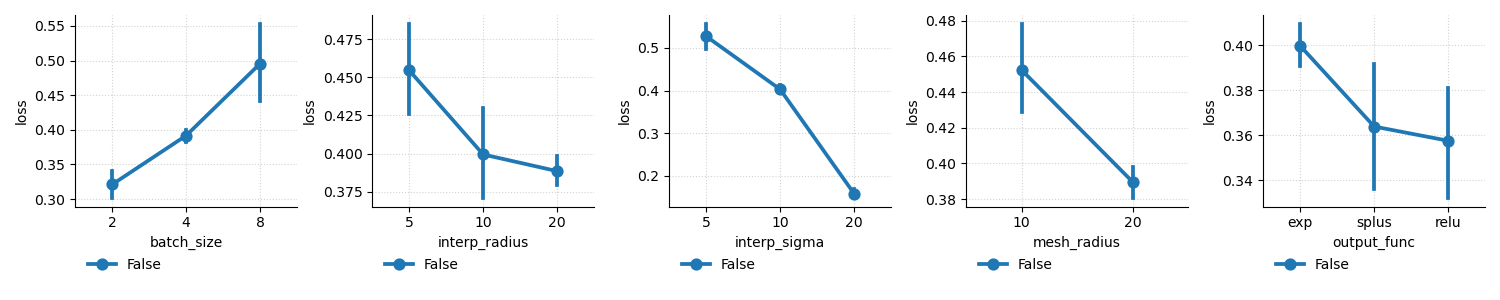

In [21]:
%autoreload
fig = ps.plot(
    m[(m.phase == 'train') & (m.epoch > 90) & (m.output_func != 'id')],
    x=['batch_size', 'interp_radius', 'interp_sigma', 'mesh_radius', 'output_func'],
    y=['loss'],
    hue=False,
    legend=True,
    legend_kws=dict(bbox_to_anchor=(0, -0.2)),
    tight=True,
)

In [ ]:
m[(m.phase == 'train') & (m.epoch > 90)].groupby(['n_nodes', 'image_size', 'nodes_per_pixel', 'batch_size'])[['u_loss', 'mu_loss']].mean()

In [ ]:
m.columns

In [ ]:
%autoreload
fig = ps.plot(
    m[(m.phase == 'train')],
    x=['image_size', 'n_nodes', 'batch_size'],
    y=['t_model', 't_loss', 't_grad', 't_optim'],
    legend=True,
    legend_kws=dict(bbox_to_anchor=(0, -0.2)),
    tight=True
)